<b>TASK 2 </b><br>
<b>Exploring Supervised Machine Learning

<b>Linear Regression</b>

<p color='red'>In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear
regression task as it involves just two variables.</p>

In [2]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import seaborn as sns
%matplotlib inline 

In [3]:
#importing the data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Student marks data is successfully imported")
data.head()

Student marks data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [43]:
print("Shape of the given data:",data.shape)

Shape of the given data: (25, 2)


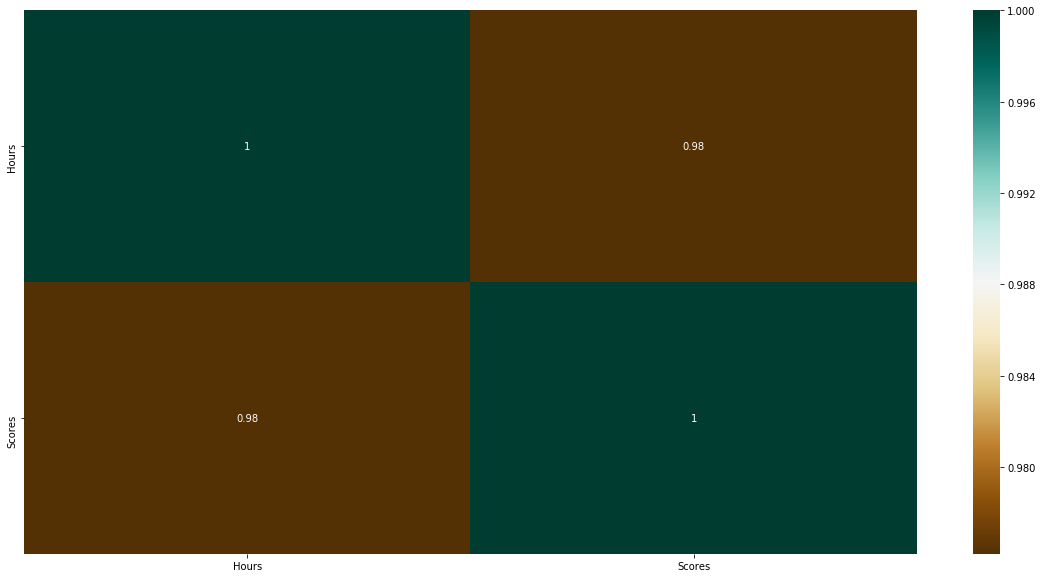

In [5]:
#heatmap of correlation matrix 
plt.figure(figsize=(20,10))
c = data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

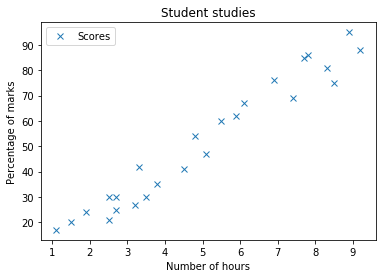

In [71]:
#visualizing  the data

data.plot(x='Hours', y='Scores', style='x')  
plt.title('Student studies')  
plt.xlabel('Number of hours')  
plt.ylabel('Percentage of marks')  
plt.show()

In [44]:
#Removing the outliers if any found

outlier_data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
if (outlier_data.shape == data.shape):
    print("No outlier is found.")
    print(data.shape)
else:
    print("Given dataset contains outliers.")
    print(outlier_data.shape)

No outlier is found.
(25, 2)


In [42]:
#warpping the data

X = data.iloc[:,:-1].values
y = data.iloc[:,1].values
print("Shape of independent variable:",X.shape);
print("Shape of target variable:",y.shape)

Shape of independent variable: (25, 1)
Shape of target variable: (25,)


In [72]:
#splitting the data into train set and test set

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2,random_state=7)

In [46]:
#training the model

linear = LinearRegression()
linear.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [17]:
#evaluating the model
evaluate(linear, val_X, val_y)

Model Performance
Average Error: 4.8490 degrees.
Accuracy = 85.62%.


85.620165864873

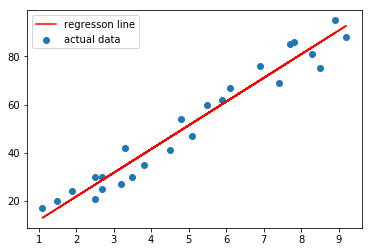

In [47]:
#plotting the regression line
line = linear.coef_*x + linear.intercept_

plt.scatter(x,y,label='actual data')
plt.plot(x,line,c='red',label='regresson line')
plt.legend()
plt.show()

In [54]:
#predicting the test set
pred = linear.predict(val_X)
pred

array([52.33357604, 16.89577953, 60.20864193, 34.61467779, 33.63029455])

In [59]:
table = pd.DataFrame({'Actual':val_y, 'Predicted':pred})
table

,Actual,Predicted
0,47,52.333576
1,20,16.895780
2,62,60.208642
3,42,34.614678
4,27,33.630295


What will be predicted score if a student study for 9.25 hrs in a
day?

In [73]:
#Predicting the score if a student study for 9.25 hrs

test = 9.25
pred_score = linear.predict([[test]])
print("No.of hours =",test)
print("Predicted score =",pred_score[0])

No.of hours = 9.25
Predicted score = 93.18548035389907
